# AVOCADO PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("avocado.csv")
df.head(30)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0'], inplace = True, axis = 1)

#Drop as it is not related to dataset and we have index already

In [5]:
df.dtypes

#There are 3 Object column and others are Float or Int64

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [7]:
df.isnull().sum()

#No null Values

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.rename(columns = {'AveragePrice':'Avg_Price', 'Total Volume':'Volume','Total Bags':'Total_Bags','Small Bags' : 'Small_Bags','Large Bags' : 'Large_Bags','XLarge Bags':'XLarge_Bags','type':'Type','year':'Year','region':'Region'}, inplace = True)

In [9]:
df.head()

,Date,Avg_Price,Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df['Region'].value_counts()

CincinnatiDayton       338
BuffaloRochester       338
StLouis                338
Denver                 338
Jacksonville           338
SouthCarolina          338
Orlando                338
Columbus               338
Albany                 338
Indianapolis           338
Houston                338
Charlotte              338
Portland               338
NewYork                338
Northeast              338
Seattle                338
Midsouth               338
Philadelphia           338
RichmondNorfolk        338
Tampa                  338
Detroit                338
SouthCentral           338
GrandRapids            338
West                   338
RaleighGreensboro      338
Southeast              338
Atlanta                338
Nashville              338
Chicago                338
DallasFtWorth          338
HartfordSpringfield    338
California             338
Boston                 338
Sacramento             338
Boise                  338
BaltimoreWashington    338
Pittsburgh             338
L

In [11]:
df['Type'].value_counts()

conventional    9126
organic         9123
Name: Type, dtype: int64

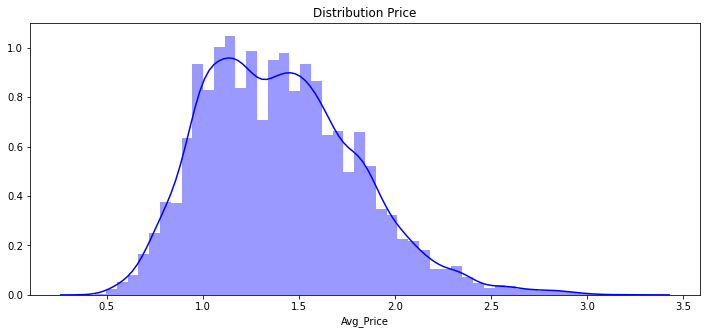

In [12]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(df["Avg_Price"], color = 'b')


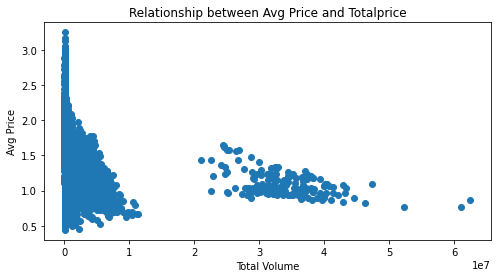

In [13]:
y = df.Avg_Price
x = df.Volume
plt.figure(figsize=(8,4))
plt.scatter(x,y)

plt.title('Relationship between Avg Price and Totalprice')

plt.xlabel('Total Volume')
plt.ylabel('Avg Price')
plt.show()

AS we can visulise that ther is no relation between total volume and avg price

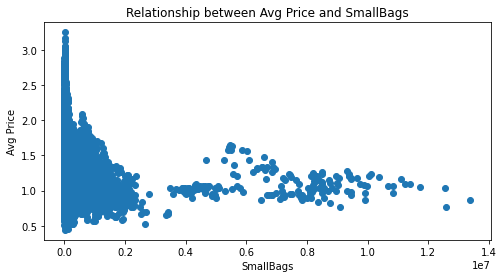

In [14]:
y = df.Avg_Price
x = df.Small_Bags
plt.figure(figsize=(8,4))
plt.scatter(x,y)

plt.title('Relationship between Avg Price and SmallBags')

plt.xlabel('SmallBags')
plt.ylabel('Avg Price')
plt.show()

AS we can visulise that ther is no relation between total volume and avg price

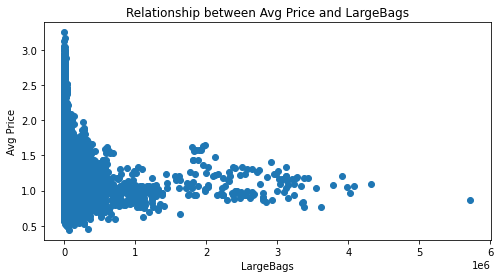

In [15]:
y = df.Avg_Price
x = df.Large_Bags
plt.figure(figsize=(8,4))
plt.scatter(x,y)

plt.title('Relationship between Avg Price and LargeBags')

plt.xlabel('LargeBags')
plt.ylabel('Avg Price')
plt.show()

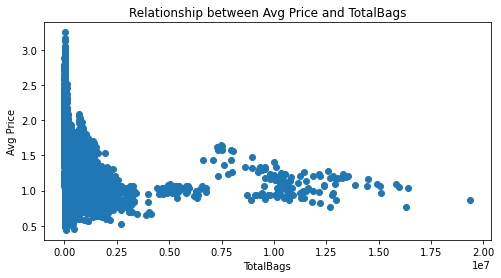

In [16]:
y = df.Avg_Price
x = df.Total_Bags
plt.figure(figsize=(8,4))
plt.scatter(x,y)

plt.title('Relationship between Avg Price and TotalBags')

plt.xlabel('TotalBags')
plt.ylabel('Avg Price')
plt.show()

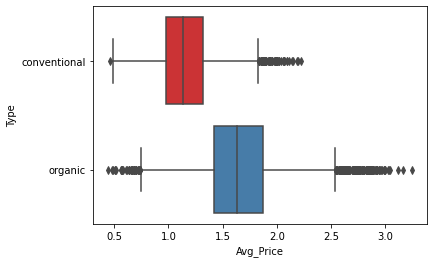

In [17]:
sns.boxplot(y="Type", x="Avg_Price", data=df, palette = 'Set1')

Here we can say that Price or Organic Avocado is higher then Conventional

Now,we will Use Groupby method and using it we will check avg price of bags and yearwise avg price

In [18]:
df.groupby('Year', as_index=False)['Avg_Price'].mean()

,Year,Avg_Price
0,2015,1.375590
1,2016,1.338640
2,2017,1.515128
3,2018,1.347531


In [19]:
df.groupby('Year', as_index=False)['Small_Bags'].mean()

,Year,Small_Bags
0,2015,113033.429256
1,2016,197025.327568
2,2017,213728.158838
3,2018,278349.820795


In [20]:
df.groupby('Year', as_index=False)['Large_Bags'].mean()

,Year,Large_Bags
0,2015,23520.285037
1,2016,59940.587974
2,2017,69790.115367
3,2018,95358.015340


In [21]:
df.groupby('Year', as_index=False)['XLarge_Bags'].mean()

,Year,XLarge_Bags
0,2015,969.390611
1,2016,3568.070662
2,2017,4193.843471
3,2018,5563.728295


In [22]:
df.groupby('Year', as_index=False)['Total_Bags'].mean()

,Year,Total_Bags
0,2015,137523.105437
1,2016,260533.986204
2,2017,287712.119423
3,2018,379271.564429


In [23]:
df.corr()

,Avg_Price,Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Year
Avg_Price,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total_Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small_Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large_Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge_Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


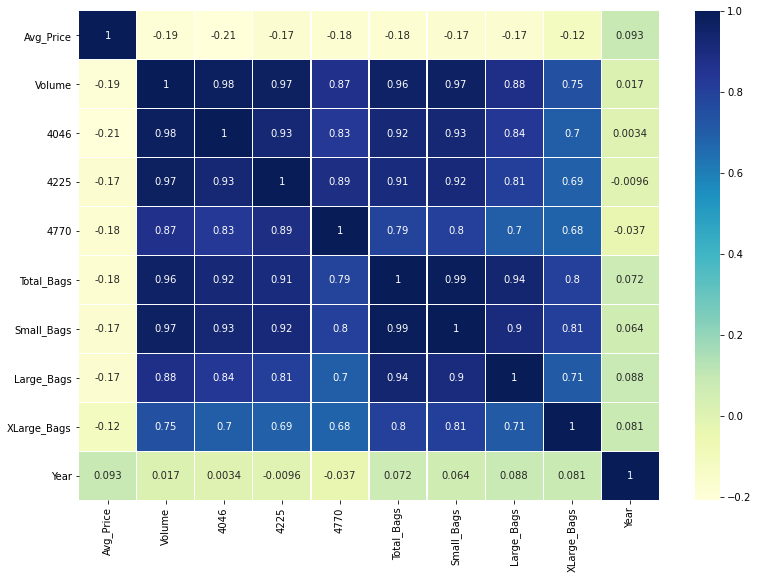

In [24]:
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),vmax=1,linewidth=0.1,annot = True,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

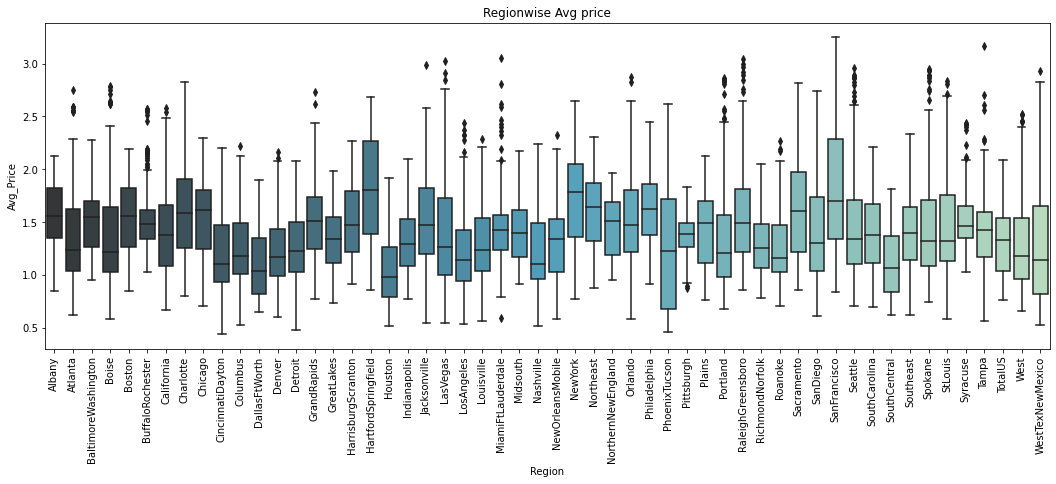

In [25]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'Region', y = 'Avg_Price', data = df, palette= 'GnBu_d').set_title('Regionwise Avg price')
plt.xticks(rotation=90)
plt.show()

AVG price is lower in Pheonituncston and it goes very high in sanfransisco

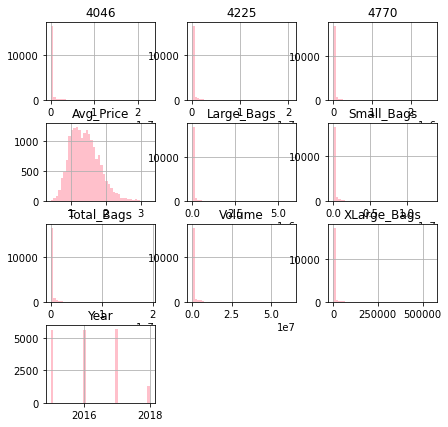

In [26]:
df.hist(figsize=(7,7),bins=40, color='pink')
plt.show()

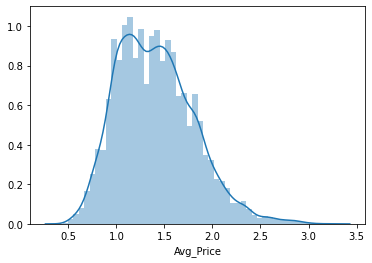

In [27]:
sns_plot = sns.distplot(df["Avg_Price"])


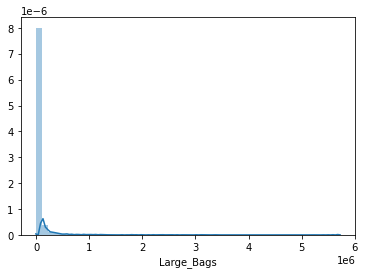

In [28]:
sns_plot = sns.distplot(df["Large_Bags"])


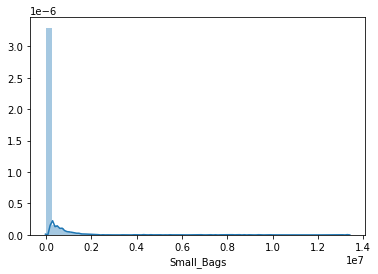

In [29]:
sns_plot = sns.distplot(df["Small_Bags"])


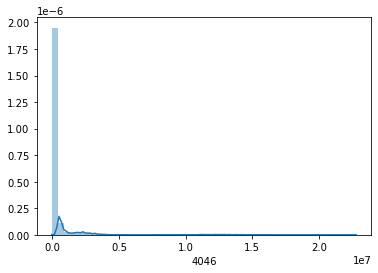

In [30]:
sns_plot = sns.distplot(df["4046"])


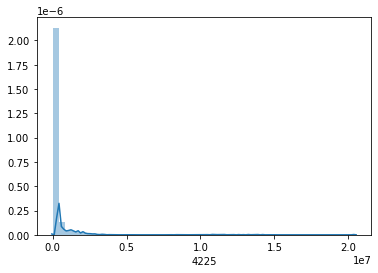

In [31]:
sns_plot = sns.distplot(df["4225"])


In [32]:
df.skew()

Avg_Price       0.580303
Volume          9.007687
4046            8.648220
4225            8.942466
4770           10.159396
Total_Bags      9.756072
Small_Bags      9.540660
Large_Bags      9.796455
XLarge_Bags    13.139751
Year            0.215339
dtype: float64

In [33]:
df.head()

,Date,Avg_Price,Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [34]:
df['Date'] =df['Date'].astype('datetime64[ns]')

In [35]:
df.head()

copy = df

In [36]:
df.columns

Index(['Date', 'Avg_Price', 'Volume', '4046', '4225', '4770', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'Type', 'Year', 'Region'],
      dtype='object')

In [37]:
df['Type'] = pd.get_dummies(df['Type'], drop_first = True)

In [38]:
reg_dum =pd.get_dummies(df['Region'], prefix='reg')

df= pd.concat([df, reg_dum], axis=1)
df = df.drop('Region',1)
df.head() 

,Date,Avg_Price,Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,...,reg_SouthCarolina,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [40]:
df['Month']

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Month, Length: 18249, dtype: int64

In [41]:
df.head()

,Date,Avg_Price,Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,...,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,11


In [42]:
df.drop(['Date'], inplace = True, axis = 1)

In [43]:
df.describe()

,Avg_Price,Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,...,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,...,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,...,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018357,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,...,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134243,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [44]:
df.skew()

Avg_Price                0.580303
Volume                   9.007687
4046                     8.648220
4225                     8.942466
4770                    10.159396
                          ...    
reg_Tampa                7.142715
reg_TotalUS              7.142715
reg_West                 7.142715
reg_WestTexNewMexico     7.176475
Month                    0.106617
Length: 66, dtype: float64

In [45]:
from scipy.stats import boxcox
for col in df:
    if df[col].skew()>=6:
        df[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation


In [46]:
df.skew()

Avg_Price               0.580303
Volume                  2.236143
4046                    2.277861
4225                    2.130378
4770                    2.316048
                          ...   
reg_Tampa               7.142715
reg_TotalUS             7.142715
reg_West                7.142715
reg_WestTexNewMexico    7.176475
Month                   0.106617
Length: 66, dtype: float64

In [47]:
x =df.drop('Avg_Price',axis=1)
y =df['Avg_Price']

In [48]:
from sklearn.preprocessing import StandardScaler
STD=StandardScaler()
x=STD.fit_transform(x)

In [49]:
df.head()

,Avg_Price,Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,...,reg_SouthCentral,reg_Southeast,reg_Spokane,reg_StLouis,reg_Syracuse,reg_Tampa,reg_TotalUS,reg_West,reg_WestTexNewMexico,Month
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [50]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    if round(ln.score(x_train,y_train)*100,2)==round(ln.score(x_test,y_test)*100,2):
        print('At random state',i,'score is best')
        print('Train score',ln.score(x_train,y_train)*100)
        print('Test Score',ln.score(x_test,y_test))

At random state 109 score is best
Train score 65.93161604286182
Test Score 0.6593438715063307
At random state 241 score is best
Train score 65.93982809933703
Test Score 0.6593736189521209
At random state 443 score is best
Train score 65.93771337737044
Test Score 0.6593857843811901


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=120)

In [52]:
print('x_train shape is :' ,x_train.shape )
print('y_train shape is :' ,y_train.shape )
print('x_test shape is :' ,x_test.shape )
print('y_test shape is :' ,y_test.shape )

x_train shape is : (14599, 65)
y_train shape is : (14599,)
x_test shape is : (3650, 65)
y_test shape is : (3650,)


In [53]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)
print('Error')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Train Score 66.25119002236882
Error
MAE 0.17655035698595614
MSE 0.05361365180896127
RMSE 0.23154621959548652
R2 Score 64.57714761209796


In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [55]:
dtr=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
kn=KNeighborsRegressor(n_neighbors=5)

In [56]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('TRAINING:-',f.score(x_train,y_train)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [57]:
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("DecisionTreeRegressor")
print('Training Score:-',dtr.score(x_train,y_train)*100)
print('MAE',mean_absolute_error(y_test,preddtr))
print('MSE',mean_squared_error(y_test,preddtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,preddtr)))
print('R2 Score',r2_score(y_test,preddtr)*100)

DecisionTreeRegressor
Training Score:- 100.0
MAE 0.11511506849315067
MSE 0.03215082191780822
RMSE 0.17930650272036489
R2 Score 78.75776447755628


In [58]:
fun(svr)

TRAINING:- 83.4002145491271
MAE 0.11712572135730503
MSE 0.02744181398061785
RMSE 0.16565570917000672
R2 Score 81.86903348133401


In [59]:
fun(kn)

TRAINING:- 93.45201538428802
MAE 0.09197534246575344
MSE 0.018138074520547942
RMSE 0.1346776689750307
R2 Score 88.01606839557336


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rd=RandomForestRegressor()
fun(rd)

TRAINING:- 98.64327553546298
MAE 0.08554545205479454
MSE 0.015329224726027404
RMSE 0.1238112463632743
R2 Score 89.8718918340816


In [62]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

TRAINING:- 57.42740461858891
MAE 0.21339452600217074
MSE 0.06912694239146022
RMSE 0.26292003041126444
R2 Score 54.32742606146408


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
ad1=AdaBoostRegressor(n_estimators=500,learning_rate=1,random_state=0)
fun(ad1)

TRAINING:- 57.203747662064416
MAE 0.2183510489077148
MSE 0.07035319717285798
RMSE 0.26524177116898084
R2 Score 53.51723237672517


In [65]:
gd=GradientBoostingRegressor()

fun(gd)

TRAINING:- 75.51616682276675
MAE 0.15206268165377457
MSE 0.04031977287576929
RMSE 0.20079784081450996
R2 Score 73.36049094396162


In [66]:
from sklearn.linear_model import ElasticNet

In [67]:
es=ElasticNet()

In [68]:
param3={'alpha':[1,10,100,0.01,0.001,0.0001],'max_iter':[10,50,250,500],'selection':['cyclic','random'],'normalize':['True','False']}


In [69]:
gd1=GridSearchCV(es,param3)
gd1.fit(x,y)

C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.74049125211025, tolerance: 0.23639451988629354
  model = cd_fast.enet_coordinate_descent(
C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.77476304527931, tolerance: 0.2438678691622714
  model = cd_fast.enet_coordinate_descent(
C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.05584888911801, tolerance: 0.24787541198849236
  model = cd_fast.enet_coordinate_descent(
C:\Users\Kishan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Converge

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 10, 100, 0.01, 0.001, 0.0001],
                         'max_iter': [10, 50, 250, 500],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random']})

In [70]:
print(gd1.best_score_)
print(gd1.best_params_)

-0.02653159942541943
{'alpha': 0.0001, 'max_iter': 10, 'normalize': 'False', 'selection': 'random'}


In [71]:
es1=ElasticNet(alpha=0.0001,max_iter=500,normalize=True,selection='random')

In [72]:
fun(es1)
predes=es1.predict(x_test)

TRAINING:- 50.73704458528534
MAE 0.2129231819398779
MSE 0.07575657902344708
RMSE 0.2752391306181719
R2 Score 49.947186479256665


In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
for i in range(2,8):
    crs_score=cross_val_score(ln,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -8.017814104336572e+17
CV Value 3
Score 31.78463193180531
CV Value 4
Score 24.83512526769813
CV Value 5
Score 33.05588218218048
CV Value 6
Score 25.251559458872585
CV Value 7
Score 30.002145290855825


In [75]:
for i in range(2,8):
    crs_score=cross_val_score(svr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -378.9323741523194
CV Value 3
Score 39.86773796143495
CV Value 4
Score 38.17748447957685
CV Value 5
Score 46.6446593792554
CV Value 6
Score 39.4555420581076
CV Value 7
Score 51.30200491386868


In [76]:
for i in range(2,8):
    crs_score=cross_val_score(dtr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -186.49083238843792
CV Value 3
Score -33.00552215688434
CV Value 4
Score -35.19450269499077
CV Value 5
Score -11.665262387586568
CV Value 6
Score -28.551220105705212
CV Value 7
Score -4.4616860328762


In [77]:
for i in range(2,11):
    crs_score=cross_val_score(kn,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -130.07991787599937
CV Value 3
Score -9.889080438446378
CV Value 4
Score -28.494491482547126
CV Value 5
Score -15.843529019144793
CV Value 6
Score -7.537819956648324
CV Value 7
Score -0.15878017416266646
CV Value 8
Score -4.620074384511105
CV Value 9
Score -1.4636634261096884
CV Value 10
Score -5.690602650495191


In [1]:
for i in range(2,11):
    crs_score=cross_val_score(rd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

NameError: name 'cross_val_score' is not defined

In [ ]:
for i in range(2,8):
    crs_score=cross_val_score(ad,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

In [ ]:
for i in range(2,8):
    crs_score=cross_val_score(gd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

In [ ]:
for i in range(2,11):
    crs_score=cross_val_score(es1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

In [ ]:
df=pd.DataFrame()

In [ ]:
import pickle
filename='Avecado.pkl'
pickle.dump(rd,open(filename,'wb'))



In [ ]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=pred

res

print(res)
sns.regplot(y_test,pred)
plt.title('Regressor Line')